# Drift Diffusion Model (DDM) Simulation

## Loading Packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

## Funktion to simulate DDM


Drift rate (v)
- Mean rate of evidence accumulation (higher = faster, more accurate decisions)

Boundary separation (a)
- Distance between decision thresholds (higher = more cautious decisions)

Starting point (z)
- Initial evidence level (bias if not centered)

Non-decision time (t0)
- Time for sensory/motor processes, not related to decision

Noise (s)
- Standard deviation of noise (often fixed at 0.1)

Time step (dt)
- simulation resolution. Smaller = more accurate but slower

Maximum duration to simulate (max_time)
- Max duration to simulate before giving up (no decision made).


In [2]:
def simulate_ddm(v=0.3, a=1.0, z=0.5, t0=0.3, s=0.1, dt=0.01, max_time=2.0):
    z *= a
    time_steps = int(max_time / dt)
    x = z
    trajectory = [x]
    for t in range(time_steps):
        x += v * dt + s * np.sqrt(dt) * np.random.randn()
        trajectory.append(x)
        if x >= a or x <= 0:
            return t * dt + t0, 1 if x >= a else 0, trajectory
    return max_time, None, trajectory  # No decision made

## Plotting different DDMs

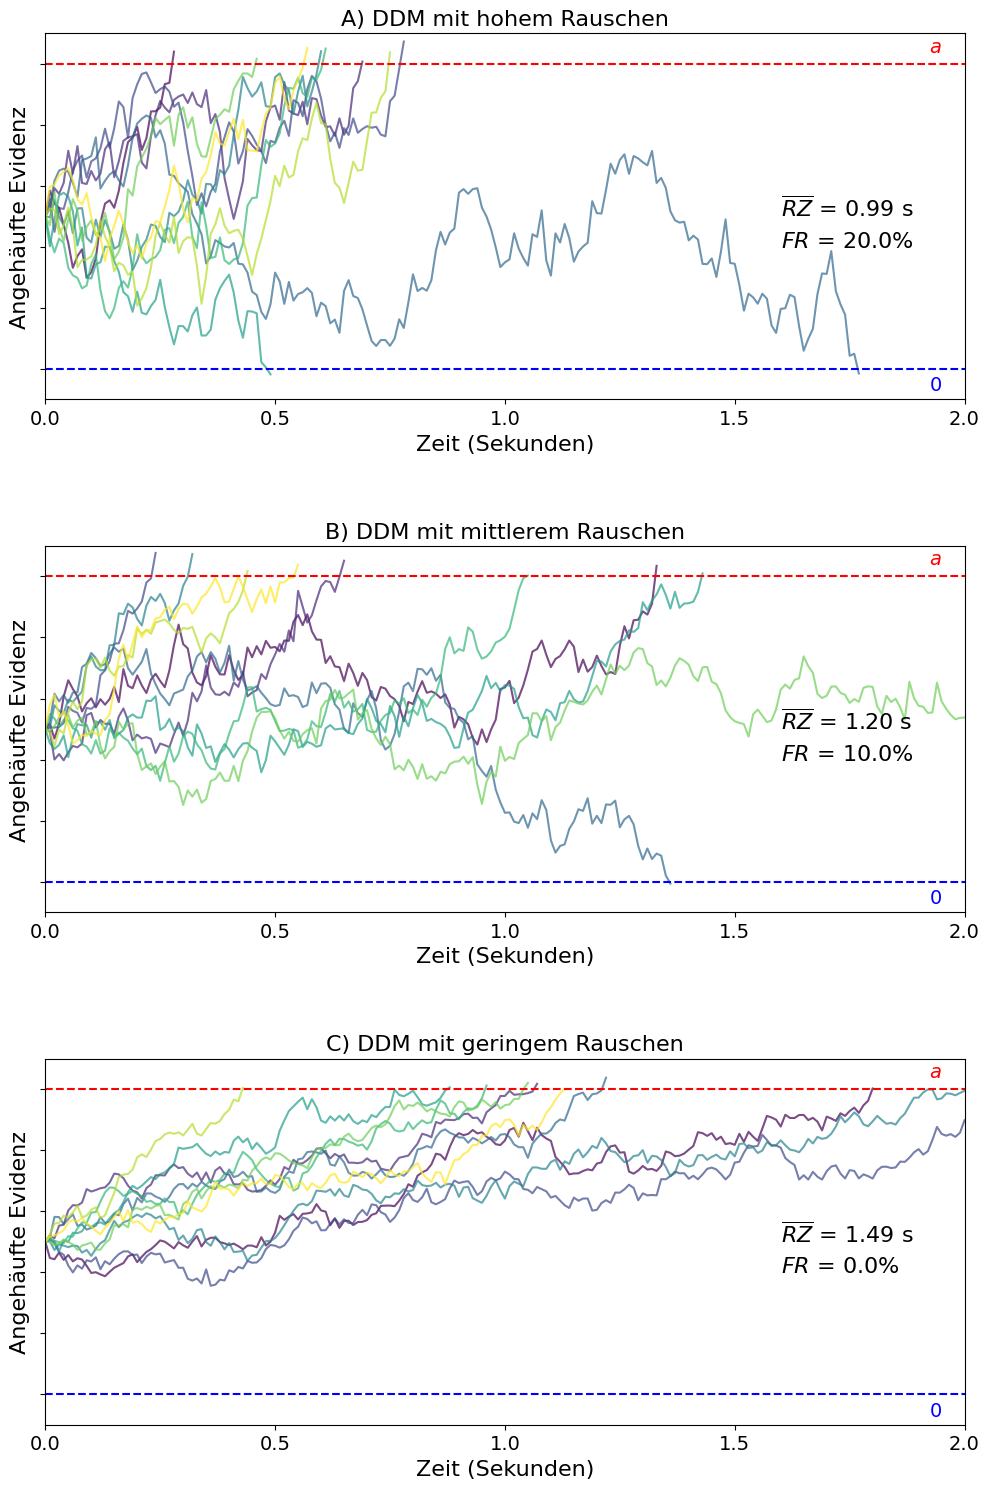

In [7]:
np.random.seed(24)

# Your DDM simulation function (you already have simulate_ddm somewhere)
# Make sure it uses the passed `dt` correctly inside

def simulate_multiple_ddm_on_ax(ax, ddm_plot_title, num_simulations=3, v=0.3, a=1.0,
                                z=0.5, t0=0.3, s=0.1, dt=0.01, max_time=2.0):
    colors = plt.cm.viridis(np.linspace(0, 1, num_simulations))
    all_data = []
    rts = []
    choices = []


    for i in range(num_simulations):
        rt, choice, traj = simulate_ddm(v, a, z, t0, s, dt, max_time)
        rts.append(rt)
        choices.append(choice)
        time = np.arange(len(traj)) * dt
        
        # Plotting
        ax.plot(time, traj, color=colors[i], alpha=0.7, label=f"Sim {i+1}, RT={rt:.2f}s")
        
        # Collect data for export
        sim_data = pd.DataFrame({
            'simulation': i + 1,
            'time': time,
            'evidence': traj,
            'rt': rt,
            'choice': choice
        })
        all_data.append(sim_data)

    # Combine all simulations into a single DataFrame
    export_df = pd.concat(all_data, ignore_index=True)
    cleaned_title = re.sub(r'[^a-zA-Z0-9_]', '_', ddm_plot_title)
    export_df.to_csv(f"exports/data_{cleaned_title}.csv", index=False)

    rts = np.array(rts)
    choices = np.array(choices)
    mean_rt = np.mean(rts)
    error_rate = np.mean(choices == 0)

    # Stats box
    ax.text(1.6, 0.5, rf"$\overline{{RZ}}$ = {mean_rt:.2f} s", fontsize=16) # 0.2
    ax.text(1.6, 0.4, rf"$FR$ = {error_rate*100:.1f}%", fontsize=16) # 0.1

    # Boundaries
    ax.axhline(a, color='r', linestyle='--')
    ax.axhline(0.0, color='b', linestyle='--')
    ax.text(1.95, a + 0.04, r"$a$", color='red', fontsize=14, ha='right')
    ax.text(1.95, -0.07, r"$0$", color='blue', fontsize=14, ha='right')

    # Labels and layout
    ax.set_title(ddm_plot_title, fontsize=16)
    ax.set_xlim(0, 2)
    ax.set_ylim(-0.1, a + 0.1)
    ax.set_xticks(np.arange(0, 2.1, 0.5))
    ax.tick_params(axis='both', labelsize=14)
    ax.set_yticklabels([])
    ax.set_xlabel("Zeit (Sekunden)", fontsize=16)
    ax.set_ylabel("Angehäufte Evidenz", fontsize=16)


# --- Now create vertically stacked figure ---
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=False)

simulate_multiple_ddm_on_ax(
    axs[0], "A) DDM mit hohem Rauschen",
    num_simulations=10, s=0.6, v = 0.45
)

simulate_multiple_ddm_on_ax(
    axs[1], "B) DDM mit mittlerem Rauschen",
    num_simulations=10, s=0.4, v = 0.45
)

simulate_multiple_ddm_on_ax(
    axs[2], "C) DDM mit geringem Rauschen",
    num_simulations=10, s=0.2, v = 0.45
)

# Ensure all x-axis labels are shown
for ax in axs:
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig("ddm_noise_models.jpg", dpi=300)
plt.show()